In [1]:
import pandas as pd
df = pd.read_csv("import_code/csvs/posts.csv")
# df.drop(['external_author_id','language','publish_date','harvested_date'],axis=1,inplace=True)
df.head(10)

,postId:ID(Post),title,body,score,views,comments
0,5,How can I do simple machine learning without h...,<p>I've always been interested in machine lear...,8,604.0,1
1,7,What open-source books (or other materials) pr...,"<p>As a researcher and instructor, I'm looking...",4,426.0,4
2,9,NaN,"<p>Not sure if this fits the scope of this SE,...",5,NaN,0
3,10,NaN,<p>One book that's freely available is The Ele...,12,NaN,1
4,14,Is Data Science the Same as Data Mining?,<p>I am sure data science as will be discussed...,23,1495.0,1
5,15,What are the advantages and disadvantages of S...,<p>In which situations would one system be pre...,2,620.0,1
6,16,Use liblinear on big data for semantic analysis,<p>I use <a href=http://www.csie.ntu.edu.tw/~c...,18,345.0,0
7,17,NaN,<p><a href=http://www.csie.ntu.edu.tw/~cjlin/l...,0,NaN,0
8,18,NaN,NaN,0,NaN,0
9,19,How big is big data?,<p>Lots of people use the term <em>big data</e...,87,12620.0,5


#### Data cleaning function

In [2]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re
import collections
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
#     soup = BeautifulSoup(text, 'lxml')
#     souped = soup.get_text()
#     try:
#         bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
#     except:
#         bom_removed = souped
    stripped = re.sub(combined_pat, '', text)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()
testing = df.body[:10]
test_result = []
for t in testing:
    t = str(t)
    #print(type(t))
    test_result.append(tweet_cleaner(t))
test_result

['ve always been interested in machine learning but can not figure out one thing about starting',
 'as researcher and instructor looking for open source books or similar materials that pro',
 'not sure if this fits the scope of this se but here stab at an answer anyway with all',
 'one book that freely available is the elements of statistical learning by hastie tibshirani',
 'am sure data science as will be discussed in this forum has several synonyms or at least relate',
 'in which situations would one system be preferred over the other what are the relative advantage',
 'use href to train data and predict clas',
 'href rel nofollow libsvm is library for suppor',
 'nan',
 'lots of people use the term em big data em in rather em commercial em way as means of']

In [3]:
nums = [0,39929]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    #i = str(i)
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))
    df['body'][i] = str(df['body'][i])
    clean_tweet_texts.append(tweet_cleaner(df['body'][i]))

Cleaning and parsing the tweets...



/Users/computer/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Tweets 10000 of 39929 has been processed
Tweets 20000 of 39929 has been processed
Tweets 30000 of 39929 has been processed


In [4]:
count_row = df.shape[0]

In [5]:
print(count_row)

39929


In [6]:
print(clean_tweet_texts[1])

as researcher and instructor looking for open source books or similar materials that pro


In [7]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])

In [14]:
clean_df.head(10)

,text,postId
0,ve always been interested in machine learning ...,5
1,as researcher and instructor looking for open ...,7
2,not sure if this fits the scope of this se but...,9
3,one book that freely available is the elements...,10
4,am sure data science as will be discussed in t...,14
5,in which situations would one system be prefer...,15
6,use href to train data and predict clas,16
7,href rel nofollow libsvm is library for suppor,17
8,nan,18
9,lots of people use the term em big data em in ...,19


In [13]:
clean_df['postId']= df['postId:ID(Post)']

In [15]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,postId
0,ve always been interested in machine learning ...,5
1,as researcher and instructor looking for open ...,7
2,not sure if this fits the scope of this se but...,9
3,one book that freely available is the elements...,10
4,am sure data science as will be discussed in t...,14


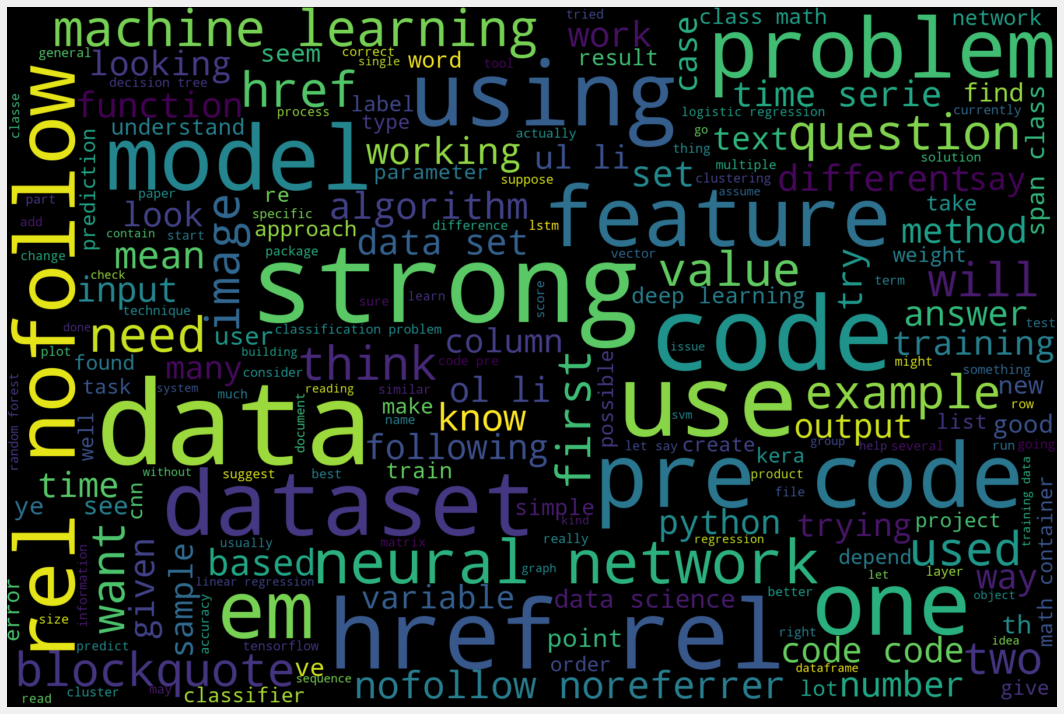

In [17]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_tweets = my_df[]
all_string = []
for t in all_tweets.text:
    all_string.append(t)
all_string = pd.Series(all_string).str.cat(sep=' ')
from wordcloud import WordCloud
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
#stopping=["do","not"]
wordcloud = WordCloud(stopwords=stopwords, width=1800, height=1200,max_font_size=200).generate(all_string)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()